In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [5]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [3]:
""" 0 : 악성 , 1 : 양성 """
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
x_train, x_test, y_train, y_test = \
train_test_split(x,y, random_state = 7)

In [5]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
pre = model.predict(x_test)
pre

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [7]:
np.bincount(pre)

array([ 39, 104], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_test, pre)

array([[38,  7],
       [ 1, 97]], dtype=int64)

*0.0 : 실제 악성 , 예측 악성 \
*0.1 : 실제 악성,  예측 악성\
*1.0 : 실제 양성, 예측 악성\
*1.1 :실제 양성, 예측 양성

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.93      0.99      0.96        98

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.95      0.94      0.94       143



In [29]:
from sklearn.metrics import roc_curve

In [32]:
fpr, tpr, th = roc_curve(y_test, model.decision_function(x_test))

NotFittedError: This LogisticRegression instance is not fitted yet

In [14]:
th

array([ 11.31737921,  10.31737921,   3.99683469,   3.70393085,
         1.9005691 ,   1.82594077,   1.69213763,   1.46990449,
         1.44645279,   1.14390187,   0.62793694,  -2.28904187,
        -2.5450968 , -43.07058846])

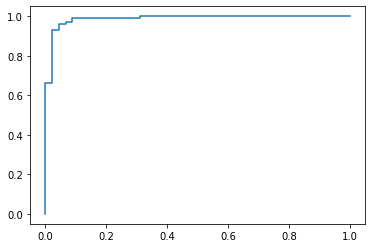

In [15]:
plt.plot(fpr, tpr)

In [16]:
from sklearn.model_selection import cross_val_score

In [34]:
c_list = [0.0001,0.001,0.01,0.1,1,10,100]
for c in c_list :
    model = LogisticRegression(C = c, solver = "lbfgs", multi_class = "auto")
    result = cross_val_score(model, x_train, y_train, cv = 5, scoring="roc_auc")
    print("C : {}\t score : {}".format(c, result.mean()))

C : 0.0001	 score : 0.9809474838886605
C : 0.001	 score : 0.9829471182412359
C : 0.01	 score : 0.9798082636317931
C : 0.1	 score : 0.9857945975593034
C : 1	 score : 0.9862619406737053
C : 10	 score : 0.9898738516385575
C : 100	 score : 0.9880810366104484


In [20]:
model1 = LogisticRegression(C=0.001)
model1.fit(x_train,y_train)
model2=LogisticRegression(C=10)
model2.fit(x_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
fpr1, tpr1, _ = roc_curve(y_test, model1.decision_function(x_test))
fpr2, tpr2, _ = roc_curve(y_test, model2.decision_function(x_test))